#### 3-1. 기본 MLP로 fashion-MNIST 분류하는 프로그램 

In [1]:
from tensorflow.keras import datasets
import tensorflow as tf 
import matplotlib.pyplot as plt 

from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 데이터셋 로드하기 
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape  # 60000개의 샘플 각각 28*28 크기 


# 전처리 : 0~1 사이로 변환 
train_images = train_images/255.0
test_images = test_images/255.0

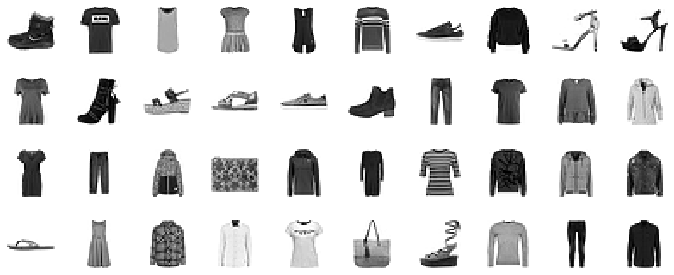

In [2]:
# 이미지 시각화 
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_images[index], cmap="binary", interpolation="nearest")
        plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [3]:
train_labels  # 0~9까지 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [4]:
# 기본 MLP 모델 생성 
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),  # input 
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # output
])


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5795 - accuracy: 0.7931 - val_loss: 0.4397 - val_accuracy: 0.8445
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4463 - accuracy: 0.8384 - val_loss: 0.3972 - val_accuracy: 0.8561
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4134 - accuracy: 0.8485 - val_loss: 0.3864 - val_accuracy: 0.8575
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3976 - accuracy: 0.8548 - val_loss: 0.3827 - val_accuracy: 0.8625
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3863 - accuracy: 0.8598 - val_loss: 0.3740 - val_accuracy: 0.8656
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3741 - accuracy: 0.8641 - val_loss: 0.3790 - val_accuracy: 0.8610
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3624 - accuracy: 0.8659 - val_loss: 0.3538 - val_accuracy

In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3477 - accuracy: 0.8811


[0.34773167967796326, 0.8810999989509583]

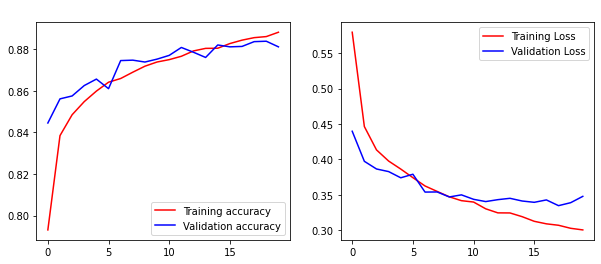

In [8]:
# 학습 과정 시각화 
def plot_history():    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
    plt.plot(history.history['val_accuracy'], 'b', label = 'Validation accuracy')
    plt.title('accuracy plot', color='white')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'r', label = 'Training Loss')
    plt.plot(history.history['val_loss'], 'b', label = 'Validation Loss')
    plt.title('loss plot', color='white')
    plt.legend()

plot_history()
